<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values


(1873, 1763)


In [7]:
X = dataset[:,0:1762]

#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,1762:1763]

#Y = np.log(Y) 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
print(Y)

[[  3.03]
 [  2.83]
 [  1.27]
 ...
 [159.08]
 [ 66.01]
 [  8.58]]


In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state = 10 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 10)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/SOLModel.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=75, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


1


Epoch 1/2000
59/59 [==============================] - ETA: 0s - loss: 9532.8428 - root_mean_squared_error: 97.6363
Epoch 1: val_root_mean_squared_error improved from inf to 91.40981, saving model to /content/drive/My Drive/SOLModel.hdf5
59/59 [==============================] - 2s 22ms/step - loss: 9532.8428 - root_mean_squared_error: 97.6363 - val_loss: 8355.7520 - val_root_mean_squared_error: 91.4098
Epoch 2/2000
55/59 [==========================>...] - ETA: 0s - loss: 7908.3271 - root_mean_squared_error: 88.9288
Epoch 2: val_root_mean_squared_error improved from 91.40981 to 86.22041, saving model to /content/drive/My Drive/SOLModel.hdf5
59/59 [==============================] - 1s 19ms/step - loss: 7982.0996 - root_mean_squared_error: 89.3426 - val_loss: 7433.9585 - val_root_mean_squared_error: 86.2204
Epoch 3/2000
58/59 [============================>.] - ETA: 0s - loss: 7182.0850 - root_mean_squared_error: 84.7472
Epoch 3: val_root_mean_squared_error improved from 86.22041 to 81.3571

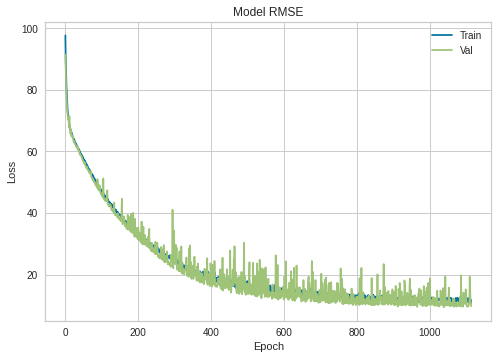

Training RMSE is
10.852102279663086
Validation RMSE is
9.468344688415527
Training loss is
117.76811981201172
Validation loss is
89.64955139160156


In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 2000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)
 
# Error Graph

plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)


loss, accuracy, f1_score, precision, recall = model.evaluate(X, Y, verbose=0)

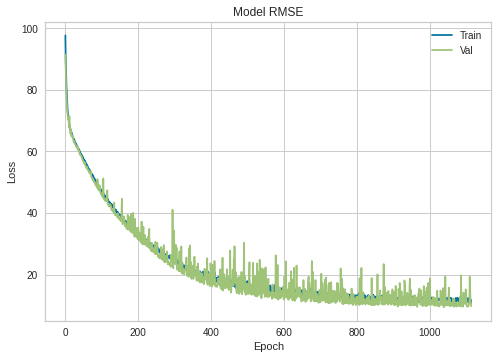

In [26]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.savefig('Training.svg', dpi = 600)



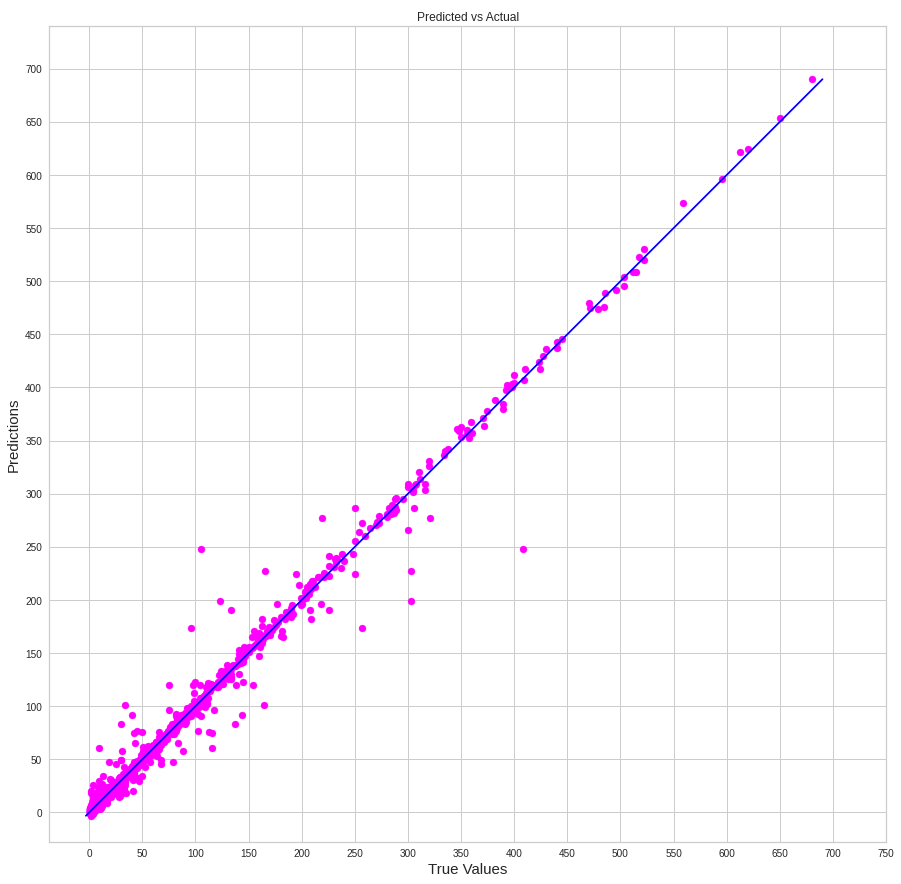

In [40]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(15,15))
plt.scatter(true_value, predicted_value, c='magenta')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,750), )
plt.xticks( range(0,800,50) )
plt.yticks( range(0,800,50) )
#plt.show()
plt.savefig('P_A_1.eps', dpi = 600)

In [39]:
loss, accuracy = model.evaluate(X, Y, verbose=1)
print(loss, accuracy)

59/59 [==============================] - 0s 8ms/step - loss: 89.6496 - root_mean_squared_error: 9.4683
89.64955139160156 9.468344688415527


In [33]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd 
import numpy as np 
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1eFIxCo4gHZLa0EuGrgPuAmdOijIu_2Xj',
                                    dest_path='/content/sample_data/Sol_ME.hdf5',
                                    unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  3672#@param {type:"number"}
Excipient_CID =  5284448#@param {type:"number"}


CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint
List1 = list(FPD)
List2 = list(FPE)
List = List1 + List2
 
import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))
 
#@title RUN FOR PREDICTION
 
 
dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1762].astype(int))
print(X_Predict)
print(X_Predict.shape)
print(X_Predict.dtype)
 
Y_prediction = model.predict(X_Predict)
 
print(Y_prediction, "mg/ml")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[[1 1 1 ... 0 0 0]]
(1, 1762)
int64
[[286.87115]] mg/ml


**K - FOLD VALIDATION**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values

X = dataset[:,0:1762]

y = dataset[:,1762:1763]


(1873, 1763)


In [ ]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    filepath = '/content/drive/My Drive/SOLModel.hdf5'
 
    checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=75, verbose =1)]
    output_nodes = Y.shape[1]
    print(output_nodes)
    model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='linear')])

    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    hist = model.fit(X[train_index].astype(np.int64), y[train_index].astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X[test_index].astype(np.int64), Y[test_index].astype(np.int64)), batch_size= 100)

Streaming output truncated to the last 5000 lines.
Epoch 381: root_mean_squared_error improved from 23.81986 to 23.73163, saving model to /content/drive/My Drive/SOLModel.hdf5
15/15 [==============================] - 1s 42ms/step - loss: 563.1901 - root_mean_squared_error: 23.7316 - val_loss: 5976.9019 - val_root_mean_squared_error: 77.3104
Epoch 382/2000
15/15 [==============================] - ETA: 0s - loss: 592.4895 - root_mean_squared_error: 24.3411
Epoch 382: root_mean_squared_error did not improve from 23.73163
15/15 [==============================] - 1s 42ms/step - loss: 592.4895 - root_mean_squared_error: 24.3411 - val_loss: 6012.3491 - val_root_mean_squared_error: 77.5393
Epoch 383/2000
14/15 [===========================>..] - ETA: 0s - loss: 576.6744 - root_mean_squared_error: 24.0140
Epoch 383: root_mean_squared_error did not improve from 23.73163
15/15 [==============================] - 1s 47ms/step - loss: 589.0882 - root_mean_squared_error: 24.2711 - val_loss: 6078.3838 

In [5]:
from yellowbrick.model_selection import CVScores
cv = KFold(n_splits=2, shuffle=True, random_state=42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='linear')])

visualizer = CVScores(model, cv=cv, scoring='r2')
visualizer.fit(X, y)
visualizer.show()

YellowbrickTypeError: ignored

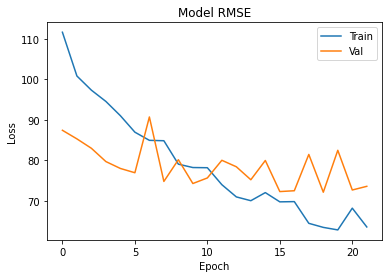

Training RMSE is
62.82951736450195
Validation RMSE is
72.13992309570312
Training loss is
3947.54833984375
Validation loss is
5204.16845703125


In [12]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

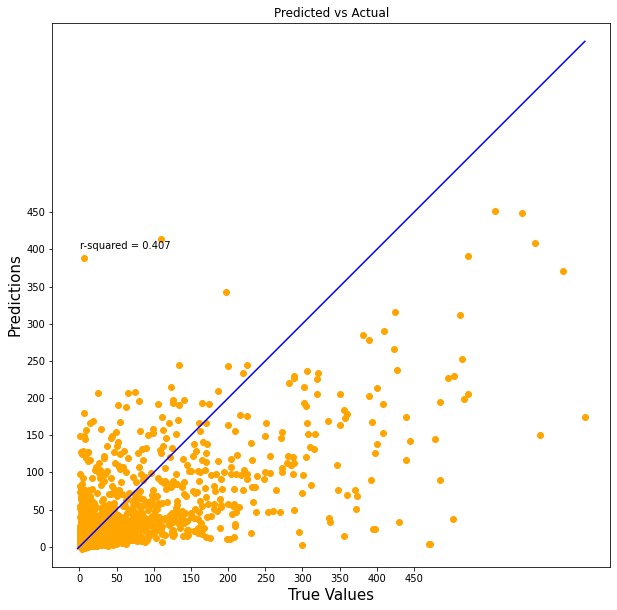

In [13]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='magenta')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,400), )
plt.xticks( range(0,500,50) )
plt.yticks( range(0,500,50) )
plt.show()